# Analyzing imdb rating of movies spanned across 100 years 

For analysis and insights, please refer to the medium article highlighted in the readme of this repository

Importing libraries and excel file

In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
os.getcwd()

'C:\\Users\\ru\\Desktop\\Programming\\PYTHONN!\\Project1\\NEW MOVIE'

N/B: The initial data set downloaded from data.org contained at least 3 genre per movie but i filtered it to  remain the most dominant genre. The new data set is uploaded in my repository as movie.xlsx

In [3]:
##reading the excel file containing the dataset. It had been encoded.

movie= pd.read_excel("movie.xlsx", encoding= "latin1" )

# Data exploration and Data cleaning

In [4]:
movie.head()

,Color,Director,CriticsNumber,Duration,Actor1,Actor2,Actor3,Gross,Genres,Title,Language,Country,ContentRating,Budget,Year,IMDBScore
0,Color,James Cameron,723.0,178.0,CCH Pounder,Joel David Moore,Wes Studi,760505847.0,Action,AvatarÂ,English,USA,PG-13,237000000.0,2009.0,7.9
1,Color,Gore Verbinski,302.0,169.0,Johnny Depp,Orlando Bloom,Jack Davenport,309404152.0,Action,Pirates of the Caribbean: At World's EndÂ,English,USA,PG-13,300000000.0,2007.0,7.1
2,Color,Sam Mendes,602.0,148.0,Christoph Waltz,Rory Kinnear,Stephanie Sigman,200074175.0,Action,SpectreÂ,English,UK,PG-13,245000000.0,2015.0,6.8
3,Color,Christopher Nolan,813.0,164.0,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,448130642.0,Action,The Dark Knight RisesÂ,English,USA,PG-13,250000000.0,2012.0,8.5
4,Color,Andrew Stanton,462.0,132.0,Daryl Sabara,Samantha Morton,Polly Walker,73058679.0,Action,John CarterÂ,English,USA,PG-13,263700000.0,2012.0,6.6


In [5]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5039 entries, 0 to 5038
Data columns (total 16 columns):
Color            5021 non-null object
Director         4936 non-null object
CriticsNumber    4991 non-null float64
Duration         5025 non-null float64
Actor1           5032 non-null object
Actor2           5027 non-null object
Actor3           5018 non-null object
Gross            4159 non-null float64
Genres           5039 non-null object
Title            5039 non-null object
Language         5028 non-null object
Country          5035 non-null object
ContentRating    4739 non-null object
Budget           4549 non-null float64
Year             4933 non-null float64
IMDBScore        5039 non-null float64
dtypes: float64(6), object(10)
memory usage: 630.0+ KB


In [6]:
movie.describe()

,CriticsNumber,Duration,Gross,Budget,Year,IMDBScore
count,4991.000000,5025.000000,4.159000e+03,4.549000e+03,4933.000000,5039.00000
mean,140.230014,107.216318,4.846841e+07,3.976907e+07,2002.479627,6.44227
std,121.609441,25.194403,6.845299e+07,2.061587e+08,12.448981,1.12420
min,1.000000,7.000000,1.620000e+02,2.180000e+02,1916.000000,1.60000
25%,50.000000,93.000000,5.340988e+06,6.000000e+06,1999.000000,5.80000
50%,110.000000,103.000000,2.551750e+07,2.000000e+07,2005.000000,6.60000
75%,195.000000,118.000000,6.230944e+07,4.500000e+07,2011.000000,7.20000
max,813.000000,511.000000,7.605058e+08,1.221550e+10,2016.000000,9.50000


In [7]:
##To remove null data cells

movie= movie.dropna()

In [8]:
movie.columns

Index(['Color', 'Director', 'CriticsNumber', 'Duration', 'Actor1', 'Actor2',
       'Actor3', 'Gross', 'Genres', 'Title', 'Language', 'Country',
       'ContentRating', 'Budget', 'Year', 'IMDBScore'],
      dtype='object')

In [9]:

movie.Year= movie.Year.astype("int64")

In [10]:
import warnings
warnings.filterwarnings("ignore")

In [11]:
movie.Year= movie.Year.astype("object")

In [12]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3829 entries, 0 to 5038
Data columns (total 16 columns):
Color            3829 non-null object
Director         3829 non-null object
CriticsNumber    3829 non-null float64
Duration         3829 non-null float64
Actor1           3829 non-null object
Actor2           3829 non-null object
Actor3           3829 non-null object
Gross            3829 non-null float64
Genres           3829 non-null object
Title            3829 non-null object
Language         3829 non-null object
Country          3829 non-null object
ContentRating    3829 non-null object
Budget           3829 non-null float64
Year             3829 non-null object
IMDBScore        3829 non-null float64
dtypes: float64(5), object(11)
memory usage: 508.5+ KB


In [13]:
movie.CriticsNumber= movie.CriticsNumber.astype("int64")
movie.Duration= movie.Duration.astype("int64")
movie.Gross= movie.Gross.astype("int64")
movie.Budget= movie.Budget.astype("int64")

In [14]:
##Filtering to focus on movies with a gross and budget more than 1 million

stats= movie[(movie.Gross>1000000) & (movie.Budget>1000000)] 

In [15]:
##Confirming the number of rows of data present in the dataframe to be used for the analysis.
len(stats)

3314

Visualizing Data Distribution

In [16]:
###Creating and modifying the data plotting environment.

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"]= 8,6

In [17]:
##Importing the seaborn gallery which helps in easy beautification of plots.
import seaborn as sns

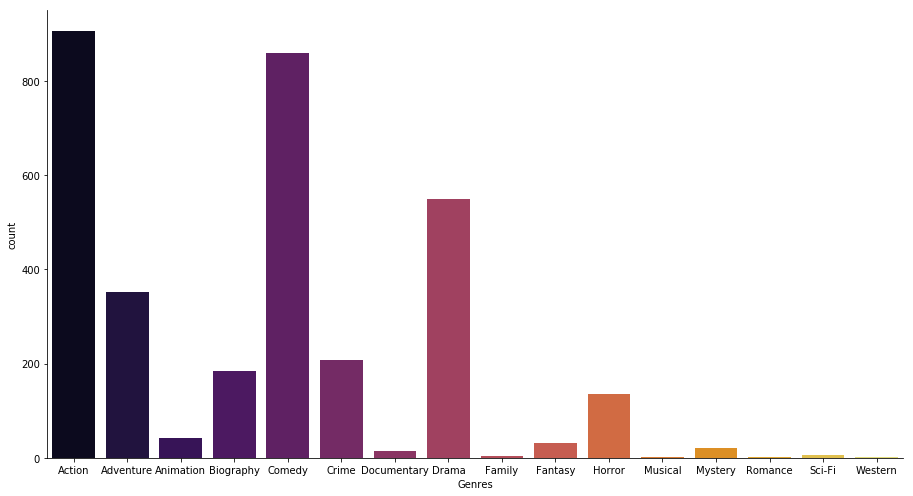

In [18]:
###This visualization helps to see the allocation of movies into the different genres.

sns.catplot (data=stats, kind= "count", x="Genres", height=7, aspect= 1.8, palette= "inferno")
plt.savefig("count.jpeg")

Futher data exploration

In [19]:
len(movie.Year.unique())

74

In [20]:
min(movie.IMDBScore)

1.6

In [21]:
max(movie.Budget)

12215500000

In [22]:
stats.Director.unique()

array(['James Cameron', 'Gore Verbinski', 'Sam Mendes', ...,
       'George Nolfi', 'John Badham', 'Dean Israelite'], dtype=object)

In [23]:
len(stats[stats.Genres=="Comedy"])

858

In [24]:
len(stats.Director)

3314

In [25]:
### Used to see the count of how many times a director appears in the data frame.
stats.Director.value_counts() 

Steven Spielberg       25
Woody Allen            19
Clint Eastwood         19
Ridley Scott           17
Tim Burton             16
Steven Soderbergh      16
Martin Scorsese        14
Spike Lee              14
Michael Bay            13
Ron Howard             13
Oliver Stone           13
Renny Harlin           13
Barry Levinson         12
Sam Raimi              12
Wes Craven             12
Peter Jackson          12
Robert Rodriguez       12
Shawn Levy             12
Robert Zemeckis        12
Joel Schumacher        12
Rob Cohen              11
Tony Scott             11
Chris Columbus         11
Rob Reiner             11
Paul W.S. Anderson     10
Brett Ratner           10
David Fincher          10
Richard Linklater      10
John McTiernan         10
M. Night Shyamalan      9
                       ..
Damien Dante Wayans     1
Paolo Sorrentino        1
Michael Chapman         1
Frank LaLoggia          1
Hal Needham             1
Stefen Fangmeier        1
Don Hall                1
Costa-Gavras

In [26]:
for stat in stats.Director:
    print (stat)

James Cameron
Gore Verbinski
Sam Mendes
Christopher Nolan
Andrew Stanton
Sam Raimi
Joss Whedon
Zack Snyder
Bryan Singer
Marc Forster
Gore Verbinski
Gore Verbinski
Zack Snyder
Andrew Adamson
Joss Whedon
Rob Marshall
Barry Sonnenfeld
Marc Webb
Ridley Scott
Peter Jackson
Anthony Russo
Peter Berg
Colin Trevorrow
Sam Mendes
Sam Raimi
Shane Black
Brett Ratner
Michael Bay
Michael Bay
Marc Webb
Joseph Kosinski
Martin Campbell
McG
James Wan
Marc Forster
Bryan Singer
J.J. Abrams
Mike Newell
Guillermo del Toro
Michael Bay
Steven Spielberg
Justin Lin
Brett Ratner
Roland Emmerich
Lana Wachowski
David Yates
Bryan Singer
Christopher Nolan
Rob Letterman
Jon Favreau
Barry Sonnenfeld
Rob Cohen
David Ayer
Doug Liman
Kevin Reynolds
Stephen Sommers
Jon Favreau
Rupert Sanders
Robert Stromberg
Matt Reeves
Carl Rinsch
Anthony Russo
Brad Bird
Joel Schumacher
Tim Burton
Quentin Tarantino
RZA
Jon Hess
Gregory Widen
David Ayer
Christopher Nolan
Brett Ratner
Brett Ratner
Tim Burton
Randall Wallace
Steven Spielberg

John Lee Hancock
Mike Leigh
Tom Shadyac
Dexter Fletcher
Dexter Fletcher
Barry Levinson
Nancy Walker
George Sidney
Andrew Bergman
Ridley Scott
Scott Cooper
Steven Spielberg
Martin Scorsese
Mike Newell
Clint Eastwood
Danny DeVito
Ted Demme
Martin Scorsese
Richard LaGravenese
Douglas McGrath
Ariel Vromen
Don Siegel
Bennett Miller
Paul Schrader
Tom McCarthy
F. Gary Gray
Michael Mann
Brian Helgeland
Andrew Dominik
Jim Sheridan
Michael Cuesta
Tim Burton
Kimberly Peirce
Peter Jackson
Brad Furman
Joel Schumacher
Patty Jenkins
George Roy Hill
Martin Scorsese
Ron Howard
Gabriele Muccino
Steven Soderbergh
David Fincher
George Tillman Jr.
Lee Daniels
James Mangold
Anne Fontaine
Marc Abraham
Danny Boyle
Stephen Frears
Denzel Washington
Philip Kaufman
Denzel Washington
Stephen Frears
Randall Wallace
Bill Condon
Simon Curtis
David Lynch
Jon Stewart
Anand Tucker
George Hickenlooper
Caroline Link
Ed Harris
Jean-Marc VallÃ©e
Bill Condon
Julian Schnabel
Marc Forster
Randall Wallace
Robert Wise
Sean McNam

Marco Schnabel
Dennis Dugan
Richard Loncraine
Gabriele Muccino
Michael Patrick Jann
Mike Nichols
Steve Pink
Luke Greenfield
Steve Pink
Frank Oz
Josh Gordon
Kent Alterman
Howard Deutch
Peter Segal
Rawson Marshall Thurber
Bobby Farrelly
Brian Robbins
Frank Coraci
David S. Ward
Brendan Malloy
Peyton Reed
Dennis Dugan
Don Michael Paul
Harold Ramis
Rawson Marshall Thurber
Grant Heslov
Howard Zieff
Seth MacFarlane
Matt Piedmont
Mel Brooks
Steven Soderbergh
Dennis Iliadis
Michael Moore
Martin Scorsese
Roman Polanski
Francis Ford Coppola
David Dobkin
David O. Russell
Taylor Hackford
Sergio Leone
Brian De Palma
Frank Darabont
Werner Herzog
Oliver Stone
Nicolas Winding Refn
Francis Ford Coppola
Abel Ferrara
John Dahl
Tim Robbins
Mike Leigh
Francis Ford Coppola
Tony Kaye
Quentin Tarantino
Mary Harron
Francis Ford Coppola
John Singleton
Harmony Korine
Paul Schrader
Fernando Meirelles
Joshua Marston
Gavin Hood
Tim Hunter
Tom Tykwer
Todd Field
Tom Tykwer
Frank Darabont
Wayne Kramer
Robert Redford
Da

Clint Eastwood
Sergio Leone


In [27]:
main= stats[(stats.Director=="Steven Spielberg") | (stats.Director=="Woody Allen") |  (stats.Director=="Clint Eastwood") \
     | (stats.Director=="Ridley Scott") | (stats.Director=="Tim Burton")  | (stats.Director=="Steven Soderbergh") \
    | (stats.Director=="Spike Lee")]

More Visualizations

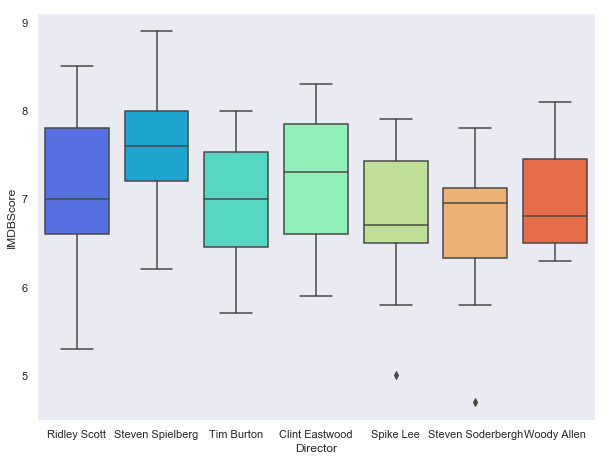

In [28]:
sns.set(rc= {"figure.figsize":(10,7.5)})
sns.set_style("dark")
sns.boxplot (data=main, y="IMDBScore", x="Director", palette= "rainbow", )



In [29]:
stats[stats.IMDBScore==9.3]

,Color,Director,CriticsNumber,Duration,Actor1,Actor2,Actor3,Gross,Genres,Title,Language,Country,ContentRating,Budget,Year,IMDBScore
3284,Color,Frank Darabont,199,142,Morgan Freeman,Jeffrey DeMunn,Bob Gunton,28341469,Crime,The Shawshank RedemptionÂ,English,USA,R,25000000,1994,9.3


In [30]:
stats[stats.Director== "Frank Darabont"]

,Color,Director,CriticsNumber,Duration,Actor1,Actor2,Actor3,Gross,Genres,Title,Language,Country,ContentRating,Budget,Year,IMDBScore
3284,Color,Frank Darabont,199,142,Morgan Freeman,Jeffrey DeMunn,Bob Gunton,28341469,Crime,The Shawshank RedemptionÂ,English,USA,R,25000000,1994,9.3
3331,Color,Frank Darabont,186,189,Tom Hanks,Jeffrey DeMunn,Michael Jeter,136801374,Crime,The Green MileÂ,English,USA,R,60000000,1999,8.5
4321,Color,Frank Darabont,128,152,Martin Landau,Hal Holbrook,Jeffrey DeMunn,27796042,Drama,The MajesticÂ,English,USA,PG,72000000,2001,6.9
4736,Color,Frank Darabont,330,126,Toby Jones,Alexa Davalos,Jeffrey DeMunn,25592632,Horror,The MistÂ,English,USA,R,18000000,2007,7.2


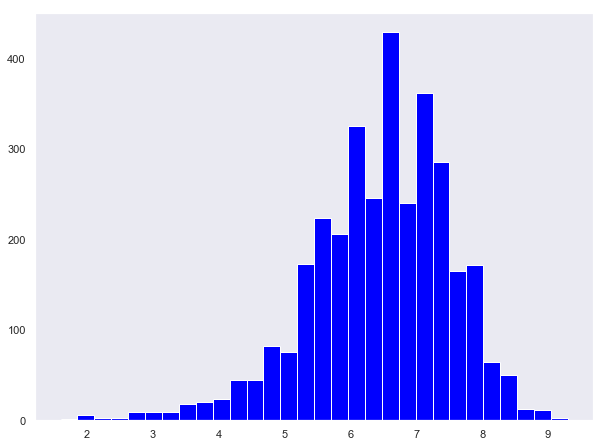

In [31]:
plt.hist(stats.IMDBScore, color= "Blue", bins= 30)
plt.show()

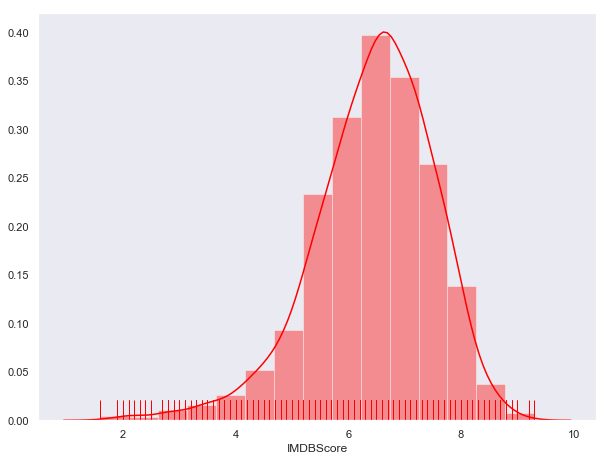

In [32]:
sns.set_style("dark")
sns.distplot(stats.IMDBScore, bins= 15 , rug= True, color= "red", kde=True, )
plt.savefig("hist.jpeg")



In [33]:
max(stats.IMDBScore)

9.3

In [34]:
for element in stats.Year.unique():
    print(element)

2009
2007
2015
2012
2016
2006
2008
2013
2011
2010
2005
2004
2014
1999
1995
1997
1992
2003
1993
1989
1998
1984
1981
2001
2000
1991
1988
1963
1990
2002
1996
1986
1987
1994
1978
1980
1983
1977
1982
1976
1979
1985
1967
1965
1969
1971
1973
1974
1964
1962
1970
1948
1975
1957
1939
1968
1940
1937
1950
1959
1972
1961
1952
1953
1946
1966


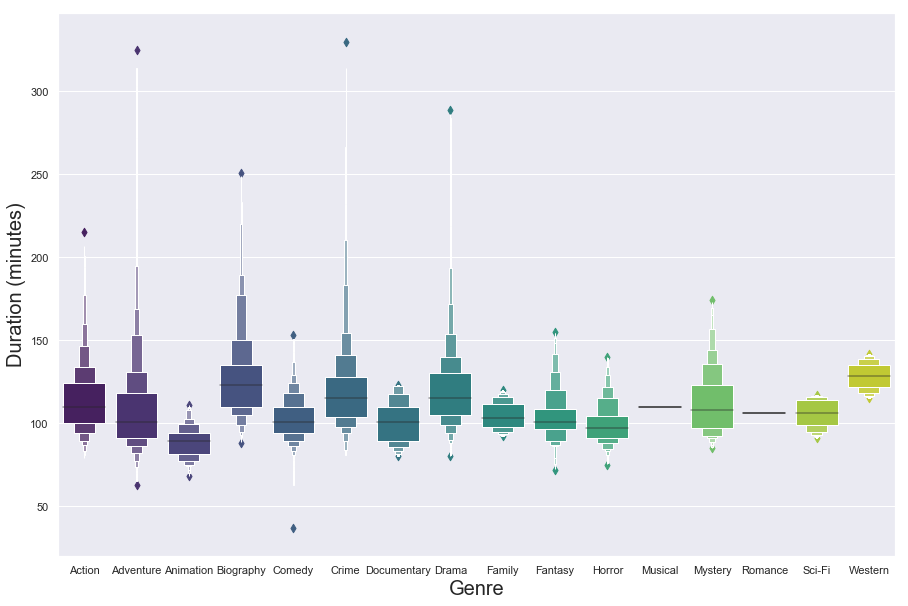

In [35]:
##This plot shows the approximate duration span of each genre in the dataframe.

sns.set(rc= {"figure.figsize": (15,10)})
sns.boxenplot(data= stats, y= "Duration", x="Genres", palette= "viridis")
plt.ylabel("Duration (minutes)", fontsize= 20)
plt.xlabel("Genre", fontsize=20)
plt.savefig("Duration.jpeg")
plt.show()

In [36]:
list1=list()
for direct in stats.Director.unique():
    print(direct)

James Cameron
Gore Verbinski
Sam Mendes
Christopher Nolan
Andrew Stanton
Sam Raimi
Joss Whedon
Zack Snyder
Bryan Singer
Marc Forster
Andrew Adamson
Rob Marshall
Barry Sonnenfeld
Marc Webb
Ridley Scott
Peter Jackson
Anthony Russo
Peter Berg
Colin Trevorrow
Shane Black
Brett Ratner
Michael Bay
Joseph Kosinski
Martin Campbell
McG
James Wan
J.J. Abrams
Mike Newell
Guillermo del Toro
Steven Spielberg
Justin Lin
Roland Emmerich
Lana Wachowski
David Yates
Rob Letterman
Jon Favreau
Rob Cohen
David Ayer
Doug Liman
Kevin Reynolds
Stephen Sommers
Rupert Sanders
Robert Stromberg
Matt Reeves
Carl Rinsch
Brad Bird
Joel Schumacher
Tim Burton
Quentin Tarantino
RZA
Jon Hess
Gregory Widen
Randall Wallace
Bobby Farrelly
Don Hall
Eric Darnell
Jennifer Yuh Nelson
Alessandro Carloni
Mark Osborne
Carlos Saldanha
Dean DeBlois
Chris Miller
Phil Lord
Hoyt Yeatman
Kevin Munroe
Simon Wells
John A. Davis
Shane Acker
Gary Trousdale
Don Bluth
Mamoru Hosoda
Robert Zemeckis
Hironobu Sakaguchi
Oliver Stone
Ron Howard
F

Tommy Lee Wallace
David Nutter
Gonzalo LÃ³pez-Gallego
Jim Gillespie
John Ottman
Jamie Blanks
Takashi Shimizu
William Brent Bell
CiarÃ¡n Foy
Jason Zada
Masayuki Ochiai
Danny Steinmann
Kevin Tenney
Katt Shea
Louis Morneau
David Gelb
Ole Bornedal
Todd Lincoln
Rob Schmidt
Gary Sherman
Dominique Othenin-Girard
Joe Chappelle
J.S. Cardone
Tom McLoughlin
Joseph Zito
Josef Rusnak
Olatunde Osunsanmi
Joel Edgerton
George Nolfi
John Badham
Dean Israelite


In [37]:
list1= list()
for direct in stats.Director.unique():
    list1.append(stats[stats.Director== direct].IMDBScore.mean())

In [38]:
list3= list()
for i in stats.Director.unique():
    list3.append(i)

In [39]:
len(list3)

1386

Creating a table showing the mean averages of different Directors

In [40]:
imdb=pd.DataFrame({"Director":np.array(list3), "IMDBMean":np.array(list1)})

In [41]:
imdb

,Director,IMDBMean
0,James Cameron,7.914286
1,Gore Verbinski,6.985714
2,Sam Mendes,7.500000
3,Christopher Nolan,8.425000
4,Andrew Stanton,7.733333
5,Sam Raimi,6.850000
6,Joss Whedon,7.925000
7,Zack Snyder,7.175000
8,Bryan Singer,7.287500
9,Marc Forster,7.300000


In [42]:
#used to sort values arranging them in ascending and descending manners
sorted(list1, reverse= True)

[8.65,
 8.6,
 8.5,
 8.5,
 8.425,
 8.4,
 8.3,
 8.3,
 8.3,
 8.233333333333334,
 8.225,
 8.2,
 8.2,
 8.2,
 8.149999999999999,
 8.133333333333333,
 8.1,
 8.1,
 8.1,
 8.1,
 8.1,
 8.1,
 8.1,
 8.1,
 8.0,
 8.0,
 8.0,
 8.0,
 8.0,
 7.9750000000000005,
 7.966666666666666,
 7.925,
 7.9142857142857155,
 7.9,
 7.9,
 7.9,
 7.9,
 7.9,
 7.9,
 7.85,
 7.85,
 7.839999999999999,
 7.833333333333333,
 7.800000000000001,
 7.800000000000001,
 7.8,
 7.8,
 7.8,
 7.8,
 7.8,
 7.8,
 7.8,
 7.8,
 7.8,
 7.8,
 7.8,
 7.8,
 7.8,
 7.766666666666667,
 7.75,
 7.75,
 7.733333333333334,
 7.733333333333333,
 7.725,
 7.716666666666666,
 7.7,
 7.7,
 7.7,
 7.7,
 7.7,
 7.7,
 7.7,
 7.7,
 7.7,
 7.7,
 7.7,
 7.7,
 7.7,
 7.699999999999999,
 7.699999999999999,
 7.675000000000001,
 7.655555555555556,
 7.65,
 7.65,
 7.65,
 7.649999999999999,
 7.633333333333333,
 7.628571428571429,
 7.6,
 7.6,
 7.6,
 7.6,
 7.6,
 7.6,
 7.6,
 7.6,
 7.6,
 7.6,
 7.6,
 7.6,
 7.6,
 7.6,
 7.6,
 7.6,
 7.6,
 7.6,
 7.6,
 7.6,
 7.599999999999999,
 7.58,
 7.575,
 7.56

In [43]:
imdb[(imdb.IMDBMean== 8.65) | (imdb.IMDBMean== 8.6) | (imdb.IMDBMean== 8.5) | 
     (imdb.IMDBMean== 8.425) | (imdb.IMDBMean== 8.4)]

,Director,IMDBMean
3,Christopher Nolan,8.425
176,Richard Marquand,8.400
1089,Sergio Leone,8.650
1094,Tony Kaye,8.600
1150,Ron Fricke,8.500
1231,Damien Chazelle,8.500


In [44]:
max(stats.IMDBScore)

9.3

In [45]:
stats

,Color,Director,CriticsNumber,Duration,Actor1,Actor2,Actor3,Gross,Genres,Title,Language,Country,ContentRating,Budget,Year,IMDBScore
0,Color,James Cameron,723,178,CCH Pounder,Joel David Moore,Wes Studi,760505847,Action,AvatarÂ,English,USA,PG-13,237000000,2009,7.9
1,Color,Gore Verbinski,302,169,Johnny Depp,Orlando Bloom,Jack Davenport,309404152,Action,Pirates of the Caribbean: At World's EndÂ,English,USA,PG-13,300000000,2007,7.1
2,Color,Sam Mendes,602,148,Christoph Waltz,Rory Kinnear,Stephanie Sigman,200074175,Action,SpectreÂ,English,UK,PG-13,245000000,2015,6.8
3,Color,Christopher Nolan,813,164,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,448130642,Action,The Dark Knight RisesÂ,English,USA,PG-13,250000000,2012,8.5
4,Color,Andrew Stanton,462,132,Daryl Sabara,Samantha Morton,Polly Walker,73058679,Action,John CarterÂ,English,USA,PG-13,263700000,2012,6.6
5,Color,Sam Raimi,392,156,J.K. Simmons,James Franco,Kirsten Dunst,336530303,Action,Spider-Man 3Â,English,USA,PG-13,258000000,2007,6.2
6,Color,Joss Whedon,635,141,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,458991599,Action,Avengers: Age of UltronÂ,English,USA,PG-13,250000000,2015,7.5
7,Color,Zack Snyder,673,183,Henry Cavill,Lauren Cohan,Alan D. Purwin,330249062,Action,Batman v Superman: Dawn of JusticeÂ,English,USA,PG-13,250000000,2016,6.9
8,Color,Bryan Singer,434,169,Kevin Spacey,Marlon Brando,Frank Langella,200069408,Action,Superman ReturnsÂ,English,USA,PG-13,209000000,2006,6.1
9,Color,Marc Forster,403,106,Giancarlo Giannini,Mathieu Amalric,Rory Kinnear,168368427,Action,Quantum of SolaceÂ,English,UK,PG-13,200000000,2008,6.7


In [46]:
stats[stats.IMDBScore >= 8.8 ]

,Color,Director,CriticsNumber,Duration,Actor1,Actor2,Actor3,Gross,Genres,Title,Language,Country,ContentRating,Budget,Year,IMDBScore
47,Color,Christopher Nolan,645,152,Christian Bale,Heath Ledger,Morgan Freeman,533316061,Action,The Dark KnightÂ,English,USA,PG-13,185000000,2008,9.0
236,Color,Peter Jackson,297,171,Christopher Lee,Orlando Bloom,Billy Boyd,313837577,Action,The Lord of the Rings: The Fellowship of the R...,English,New Zealand,PG-13,93000000,2001,8.8
237,Color,Peter Jackson,328,192,Orlando Bloom,Billy Boyd,Bernard Hill,377019252,Action,The Lord of the Rings: The Return of the KingÂ,English,USA,PG-13,94000000,2003,8.9
335,Color,Irvin Kershner,223,127,Harrison Ford,Kenny Baker,Anthony Daniels,290158751,Action,Star Wars: Episode V - The Empire Strikes BackÂ,English,USA,PG,18000000,1980,8.8
419,Color,Christopher Nolan,642,148,Leonardo DiCaprio,Tom Hardy,Joseph Gordon-Levitt,292568851,Action,InceptionÂ,English,USA,PG-13,160000000,2010,8.8
1788,Black and White,Steven Spielberg,174,185,Liam Neeson,Embeth Davidtz,Caroline Goodall,96067179,Biography,Schindler's ListÂ,English,USA,R,22000000,1993,8.9
2344,Black and White,Robert Zemeckis,149,142,Tom Hanks,Siobhan Fallon Hogan,Sam Anderson,329691196,Comedy,Forrest GumpÂ,English,USA,PG-13,55000000,1994,8.8
3284,Color,Frank Darabont,199,142,Morgan Freeman,Jeffrey DeMunn,Bob Gunton,28341469,Crime,The Shawshank RedemptionÂ,English,USA,R,25000000,1994,9.3
3289,Color,Francis Ford Coppola,149,220,Robert De Niro,Al Pacino,Robert Duvall,57300000,Crime,The Godfather: Part IIÂ,English,USA,R,13000000,1974,9.0
3297,Color,Quentin Tarantino,215,178,Bruce Willis,Eric Stoltz,Phil LaMarr,107930000,Crime,Pulp FictionÂ,English,USA,R,8000000,1994,8.9
